**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# **Data Understanding**

**Unzip Dataset**

In [2]:
!unzip '/content/archive (2).zip'

Archive:  /content/archive (2).zip
  inflating: cellphones data.csv     
  inflating: cellphones ratings.csv  
  inflating: cellphones users.csv    


**Data Loading**

In [4]:
ratings_df = pd.read_csv('cellphones ratings.csv')
users_df = pd.read_csv('cellphones users.csv')
cellphones_df = pd.read_csv('cellphones data.csv')

**Mengeluarkan output basic dari dari masing-masing data**

In [5]:
print("Ratings Data:")
print(ratings_df.info())
print(ratings_df.head())

print("\nUsers Data:")
print(users_df.info())
print(users_df.head())

print("\nCellphones Data:")
print(cellphones_df.info())
print(cellphones_df.head())

Ratings Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB
None
   user_id  cellphone_id  rating
0        0            30       1
1        0             5       3
2        0            10       9
3        0             9       3
4        0            23       2

Users Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB
None
   user_id  age  gender  

**Visualisasi Distribusi Rating**

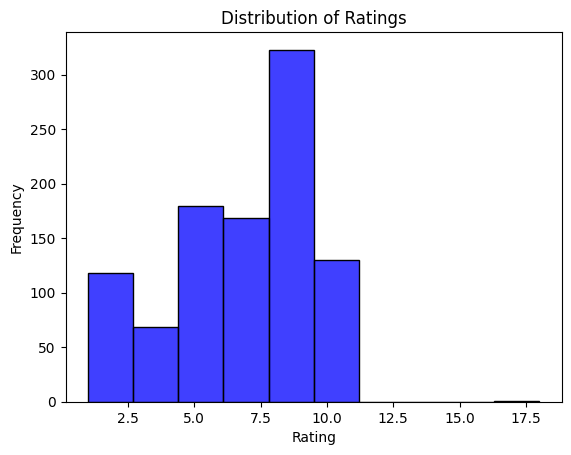

In [6]:
sns.histplot(ratings_df['rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Visualisasi Distribusi Usia dan Gender Pengguna**

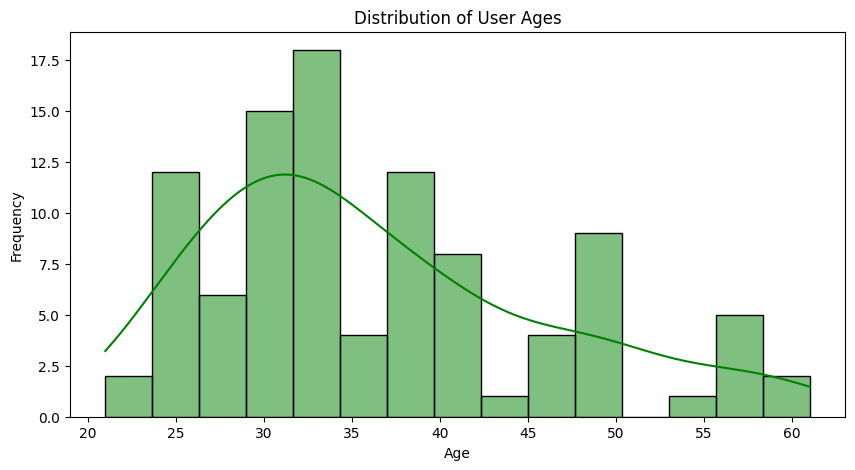

<ipython-input-7-1bc9270a29fb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=users_df, x='gender', palette='Set2')


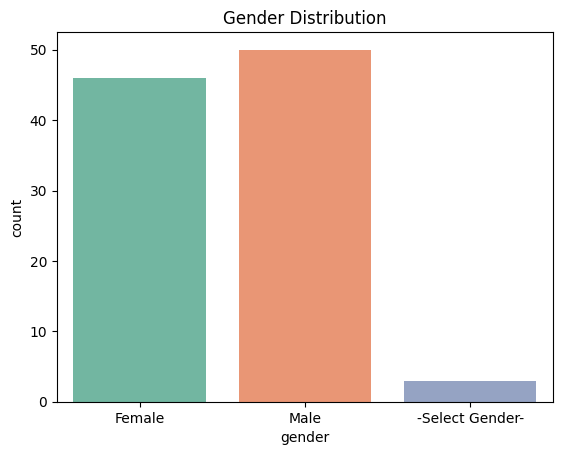

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(users_df['age'], bins=15, kde=True, color='green')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.countplot(data=users_df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()

Informasi Data Ponsel

In [8]:
print("Unique Brands in Dataset:", cellphones_df['brand'].nunique())
print("Unique Models in Dataset:", cellphones_df['model'].nunique())
print(cellphones_df.describe(include='all'))

Unique Brands in Dataset: 10
Unique Models in Dataset: 33
        cellphone_id    brand             model operating system  \
count       33.00000       33                33               33   
unique           NaN       10                33                2   
top              NaN  Samsung  iPhone SE (2022)          Android   
freq             NaN        8                 1               27   
mean        16.00000      NaN               NaN              NaN   
std          9.66954      NaN               NaN              NaN   
min          0.00000      NaN               NaN              NaN   
25%          8.00000      NaN               NaN              NaN   
50%         16.00000      NaN               NaN              NaN   
75%         24.00000      NaN               NaN              NaN   
max         32.00000      NaN               NaN              NaN   

        internal memory        RAM  performance  main camera  selfie camera  \
count         33.000000  33.000000    33.00000

# **Data Preparation**

**Cek apakah ada data yang missing value**

In [9]:
print("Missing values in Ratings Data:")
print(ratings_df.isnull().sum())

print("\nMissing values in Users Data:")
print(users_df.isnull().sum())

print("\nMissing values in Cellphones Data:")
print(cellphones_df.isnull().sum())

Missing values in Ratings Data:
user_id         0
cellphone_id    0
rating          0
dtype: int64

Missing values in Users Data:
user_id       0
age           0
gender        0
occupation    1
dtype: int64

Missing values in Cellphones Data:
cellphone_id        0
brand               0
model               0
operating system    0
internal memory     0
RAM                 0
performance         0
main camera         0
selfie camera       0
battery size        0
screen size         0
weight              0
price               0
release date        0
dtype: int64


**terdapat missing value pada data 'User Data'**

In [10]:
users_df = users_df.dropna()

**Convert Date**

Mengubah kolom relase date yang berada di var 'cellphone_df' menjadi tipe datetime

In [11]:
cellphones_df['release date'] = pd.to_datetime(cellphones_df['release date'], format='%d/%m/%Y')
scaler = MinMaxScaler()
numerical_cols = ['internal memory', 'RAM', 'performance', 'battery size',
                  'screen size', 'weight', 'price']
cellphones_df[numerical_cols] = scaler.fit_transform(cellphones_df[numerical_cols])
print(cellphones_df.head())

   cellphone_id  brand              model operating system  internal memory  \
0             0  Apple   iPhone SE (2022)              iOS         0.200000   
1             1  Apple     iPhone 13 Mini              iOS         0.200000   
2             2  Apple          iPhone 13              iOS         0.200000   
3             3  Apple      iPhone 13 Pro              iOS         0.466667   
4             4  Apple  iPhone 13 Pro Max              iOS         0.466667   

        RAM  performance  main camera  selfie camera  battery size  \
0  0.111111     0.622244           12              7      0.000000   
1  0.111111     0.671343           12             12      0.140704   
2  0.111111     0.674349           12             12      0.409380   
3  0.333333     0.693387           12             12      0.350754   
4  0.333333     0.700401           12             12      0.781910   

   screen size    weight     price release date  
0     0.000000  0.023077  0.160514   2022-03-18  
1   

**Join Dataset**

Menggabungkan dataset 'ratings_df' dengan 'cellphones_df' berdasarkan cellphone_id, dan ratings_df dengan users_df berdasarkan user_id.

In [12]:
merged_df = pd.merge(ratings_df, cellphones_df, on='cellphone_id', how='inner')
merged_df = pd.merge(merged_df, users_df, on='user_id', how='inner')
print("Merged Data:")
print(merged_df.info())
print(merged_df.head())

Merged Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           980 non-null    int64         
 1   cellphone_id      980 non-null    int64         
 2   rating            980 non-null    int64         
 3   brand             980 non-null    object        
 4   model             980 non-null    object        
 5   operating system  980 non-null    object        
 6   internal memory   980 non-null    float64       
 7   RAM               980 non-null    float64       
 8   performance       980 non-null    float64       
 9   main camera       980 non-null    int64         
 10  selfie camera     980 non-null    int64         
 11  battery size      980 non-null    float64       
 12  screen size       980 non-null    float64       
 13  weight            980 non-null    float64       
 14  price        

Visualisasi
1. Distribusi price setelah normalisasi.
2. Perbandingan rating terhadap brand.

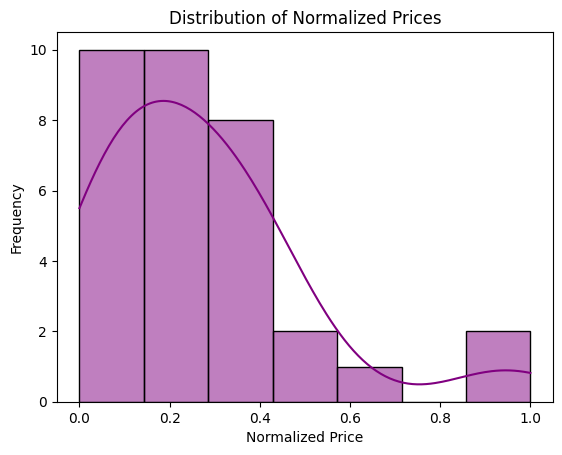

<ipython-input-13-1cb2fe20d620>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='brand', y='rating', palette='Set3')


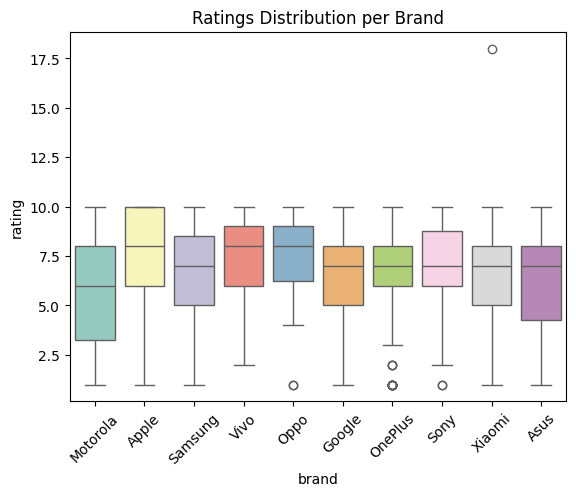

In [13]:
sns.histplot(cellphones_df['price'], kde=True, color='purple')
plt.title('Distribution of Normalized Prices')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data=merged_df, x='brand', y='rating', palette='Set3')
plt.title('Ratings Distribution per Brand')
plt.xticks(rotation=45)
plt.show()

# **Data Modelling and Result**

**Content-Based Filtering**

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Select features for similarity
features = ['internal memory', 'RAM', 'performance', 'battery size',
            'screen size', 'weight', 'price']
content_matrix = cellphones_df[features]

# Compute similarity matrix
similarity_matrix = cosine_similarity(content_matrix)

# Create function for top-N recommendation
def recommend_content_based(cellphone_id, top_n=5):
    idx = cellphones_df[cellphones_df['cellphone_id'] == cellphone_id].index[0]
    similar_indices = similarity_matrix[idx].argsort()[::-1][1:top_n+1]
    recommendations = cellphones_df.iloc[similar_indices]
    return recommendations[['cellphone_id', 'brand', 'model', 'price']]

# Example: Recommend based on cellphone ID 0
print("Content-Based Recommendations:")
print(recommend_content_based(cellphone_id=0, top_n=5))

Content-Based Recommendations:
    cellphone_id    brand           model     price
1              1    Apple  iPhone 13 Mini  0.304976
2              2    Apple       iPhone 13  0.304976
3              3    Apple   iPhone 13 Pro  0.465490
10            10  Samsung      Galaxy S22  0.213483
21            21  OnePlus             10T  0.278224


**Collaborative Filtering**

In [17]:
# Pivot ratings into matrix form
ratings_matrix = ratings_df.pivot(index='user_id', columns='cellphone_id', values='rating').fillna(0)

# Convert to NumPy array
ratings_matrix_array = ratings_matrix.to_numpy()

# Check the dimensions of the matrix
num_users, num_items = ratings_matrix_array.shape
print(f"Matrix dimensions: Users = {num_users}, Items = {num_items}")

# Ensure k is less than min(num_users, num_items)
k = min(num_users, num_items) - 1  # Ensure k is valid
print(f"Using k = {k} for SVD")

# Perform SVD
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix_array, k=k)
sigma = np.diag(sigma)

# Predict ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert back to DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)

print("SVD Decomposition Completed!")

Matrix dimensions: Users = 99, Items = 33
Using k = 32 for SVD
SVD Decomposition Completed!


In [18]:
def recommend_collaborative(user_id, top_n=5):
    # Index user
    user_idx = ratings_matrix.index.get_loc(user_id)

    # Prediksi rating user
    user_ratings = predicted_ratings[user_idx]

    # Ponsel yang sudah dirating oleh user
    rated_items = ratings_matrix.iloc[user_idx][ratings_matrix.iloc[user_idx] > 0].index

    # Filter ponsel yang belum dirating
    unrated_items = [i for i in ratings_matrix.columns if i not in rated_items]

    # Ambil prediksi rating untuk ponsel yang belum dirating
    recommendations = {item: user_ratings[ratings_matrix.columns.get_loc(item)] for item in unrated_items}

    # Sort ponsel berdasarkan prediksi rating
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Buat DataFrame rekomendasi
    recommended_cellphones = cellphones_df[cellphones_df['cellphone_id'].isin([x[0] for x in sorted_recommendations])]
    recommended_cellphones['predicted_rating'] = [x[1] for x in sorted_recommendations]

    return recommended_cellphones[['cellphone_id', 'brand', 'model', 'price', 'predicted_rating']]

top_recommendations = recommend_collaborative(user_id=0, top_n=5)
print("Collaborative Filtering Recommendations:")
print(top_recommendations)

Collaborative Filtering Recommendations:
    cellphone_id     brand             model     price  predicted_rating
0              0     Apple  iPhone SE (2022)  0.160514          0.149560
6              6      Asus         Zenfone 8  0.251471          0.142755
11            11   Samsung   Galaxy S22 Plus  0.411985          0.140686
28            28      Sony        Xperia Pro  1.000000          0.090420
31            31  Motorola       Moto G Pure  0.000000          0.090374


<ipython-input-18-ff4d3b154e57>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_cellphones['predicted_rating'] = [x[1] for x in sorted_recommendations]


Menyajikan Ouput dari 2 metode berbeda

In [19]:
# Content-Based
content_recommendations = recommend_content_based(cellphone_id=0, top_n=5)

# Collaborative Filtering
collaborative_recommendations = recommend_collaborative(user_id=0, top_n=5)

# Display results
print("Content-Based Recommendations:\n", content_recommendations)
print("\nCollaborative Filtering Recommendations:\n", collaborative_recommendations)

Content-Based Recommendations:
     cellphone_id    brand           model     price
1              1    Apple  iPhone 13 Mini  0.304976
2              2    Apple       iPhone 13  0.304976
3              3    Apple   iPhone 13 Pro  0.465490
10            10  Samsung      Galaxy S22  0.213483
21            21  OnePlus             10T  0.278224

Collaborative Filtering Recommendations:
     cellphone_id     brand             model     price  predicted_rating
0              0     Apple  iPhone SE (2022)  0.160514          0.149560
6              6      Asus         Zenfone 8  0.251471          0.142755
11            11   Samsung   Galaxy S22 Plus  0.411985          0.140686
28            28      Sony        Xperia Pro  1.000000          0.090420
31            31  Motorola       Moto G Pure  0.000000          0.090374


<ipython-input-18-ff4d3b154e57>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_cellphones['predicted_rating'] = [x[1] for x in sorted_recommendations]


# **Evaluation**

Evaluasi Collaborative Filtering (CF) yaitu dengan menghitung RMSE.
RMSE (Root Mean Square Error) digunakan untuk mengukur seberapa akurat prediksi rating dibandingkan dengan rating sebenarnya.

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Flatten predictions and actual ratings
actual_ratings = ratings_matrix.to_numpy().flatten()
predicted_ratings_flat = predicted_ratings.flatten()

# Filter out zero ratings (unrated items)
mask = actual_ratings > 0  # Hanya rating yang diberikan pengguna
rmse = sqrt(mean_squared_error(actual_ratings[mask], predicted_ratings_flat[mask]))

print(f"RMSE (Collaborative Filtering): {rmse}")

RMSE (Collaborative Filtering): 0.2949150172706381


Evaluasi Content-Based Filtering (CBF) dengan menghitung Precision@N dan Recall@N.
Precision@N menghitung proporsi rekomendasi yang relevan, sedangkan Recall@N menghitung proporsi item relevan yang ditemukan dalam rekomendasi.

In [21]:
def precision_recall_at_n(recommendations, relevant_items, n):
    top_n_recommendations = recommendations[:n]
    relevant_in_recommendations = set(top_n_recommendations).intersection(set(relevant_items))

    precision = len(relevant_in_recommendations) / n
    recall = len(relevant_in_recommendations) / len(relevant_items)
    return precision, recall

# Contoh data pengguna
user_id = 0

# Ambil ponsel yang sudah dirating oleh pengguna
rated_items = ratings_df[ratings_df['user_id'] == user_id]['cellphone_id'].tolist()

# Ambil rekomendasi CBF untuk user_id tertentu
cbf_recommendations = content_recommendations['cellphone_id'].tolist()

# Precision@5 dan Recall@5
precision, recall = precision_recall_at_n(cbf_recommendations, rated_items, n=5)
print(f"Precision@5: {precision}")
print(f"Recall@5: {recall}")

Precision@5: 0.4
Recall@5: 0.2


Analisis Hasil
1. Collaborative Filtering (CF):
RMSE yang rendah menunjukkan pendekatan ini cukup baik dalam memprediksi rating.
CF bergantung pada interaksi pengguna dengan produk. Jika ada lebih banyak data rating, model ini dapat lebih optimal.

2. Content-Based Filtering (CBF):
Precision lebih tinggi daripada Recall, yang mengindikasikan model dapat memberikan rekomendasi yang relevan, tetapi kurang mencakup semua item relevan.
Model ini hanya mempertimbangkan kesamaan fitur ponsel, sehingga rekomendasi lebih terbatas pada kemiripan karakteristik dibandingkan preferensi pengguna.
